<a href="https://colab.research.google.com/github/anshu0008/minor-diabetes/blob/main/minor_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd
sheet_url = "https://docs.google.com/spreadsheets/d/1EXql4S9YUkumJppbvIiBvXFvB27R18OefrVZgal79x8/edit?usp=sharing"
csv_url = sheet_url.replace("/edit?usp=sharing", "/export?format=csv")
df = pd.read_csv(csv_url)

In [9]:
# we will Display basic information about the dataset
print(df.info())

# Display summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

array([[<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'GenHlth'}>,
        <Axes: title={'center': 'MentHlth'}>],
       [<Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Income'}>, <Axes: >, <Axes: >]],
      dtype=object)

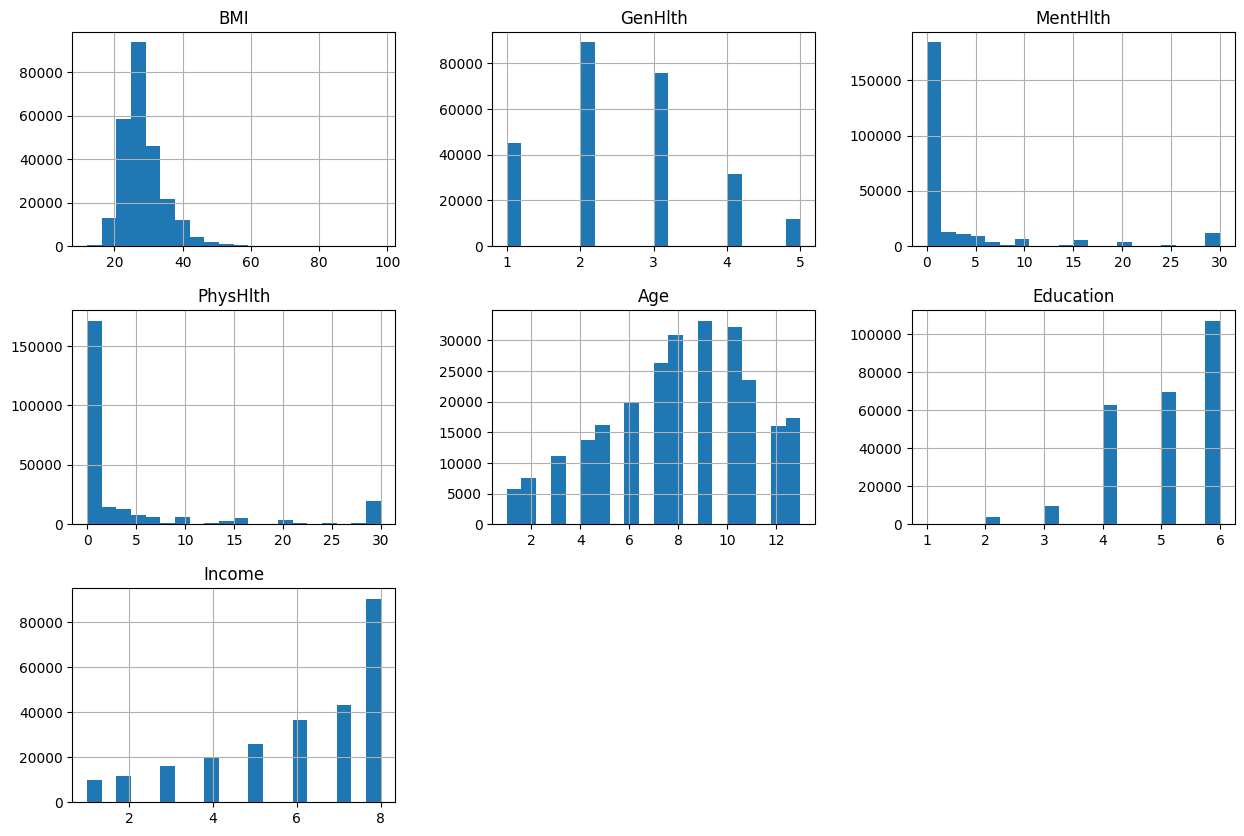

In [10]:

# Checking for missing values
df.isnull().sum()

# we are Checking the distribution of binary features
binary_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
                   'PhysActivity', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']
df[binary_features].value_counts()

# now we are Checking the distribution of numerical features
numerical_features = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
df[numerical_features].hist(bins=20, figsize=(15, 10))


In [11]:
from sklearn.preprocessing import StandardScaler

# Handling missing values
# we are Assuminging here that missing values are filled with a specific value, e.g., -1
df.fillna(-1, inplace=True)

# Encoding categorical variables
# Assuming here that there are no categorical variables other than the binary features( we found this above during EDA phase)
# If categorical variables existed, we would have handled them separately
df[binary_features] = df[binary_features].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

# Feature scaling for numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Check the preprocessed df
df.head()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,NaN,NaN,NaN,1.757936,NaN,NaN,NaN,NaN,0,...,NaN,NaN,2.329121,1.998592,1.233999,NaN,0,0.316900,-1.065595,-1.474487
1,0,NaN,NaN,NaN,-0.511806,NaN,NaN,NaN,NaN,0,...,NaN,NaN,0.457294,-0.429630,-0.486592,NaN,0,-0.337933,0.963272,-2.440138
2,0,NaN,NaN,NaN,-0.057858,NaN,NaN,NaN,NaN,1,...,NaN,NaN,2.329121,3.617407,2.954590,NaN,0,0.316900,-1.065595,0.939638
3,0,NaN,NaN,NaN,-0.209174,NaN,NaN,NaN,NaN,1,...,NaN,NaN,-0.478619,-0.429630,-0.486592,NaN,0,0.971733,-2.080028,-0.026012
4,0,NaN,NaN,NaN,-0.663122,NaN,NaN,NaN,NaN,1,...,NaN,NaN,-0.478619,-0.024926,-0.486592,NaN,0,0.971733,-0.051162,-0.991662


In [12]:
# Correlation matrix
correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                      Diabetes_binary  HighBP  HighChol  CholCheck       BMI  \
Diabetes_binary              1.000000     NaN       NaN        NaN  0.216843   
HighBP                            NaN     NaN       NaN        NaN       NaN   
HighChol                          NaN     NaN       NaN        NaN       NaN   
CholCheck                         NaN     NaN       NaN        NaN       NaN   
BMI                          0.216843     NaN       NaN        NaN  1.000000   
Smoker                            NaN     NaN       NaN        NaN       NaN   
Stroke                            NaN     NaN       NaN        NaN       NaN   
HeartDiseaseorAttack              NaN     NaN       NaN        NaN       NaN   
PhysActivity                      NaN     NaN       NaN        NaN       NaN   
Fruits                      -0.040779     NaN       NaN        NaN -0.087518   
Veggies                     -0.056584     NaN       NaN        NaN -0.062275   
HvyAlcoholConsump  

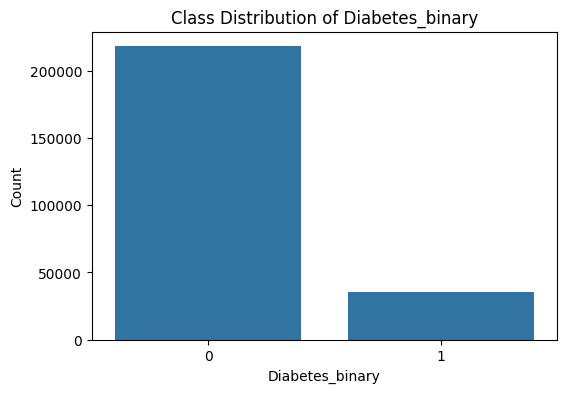

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

#we are Plotting class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Diabetes_binary', data=df)
plt.title('Class Distribution of Diabetes_binary')
plt.xlabel('Diabetes_binary')
plt.ylabel('Count')
plt.show()

In [14]:
from imblearn.combine import SMOTEENN
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import pandas as pd


# Separate features and target variable
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']

# Define the imputer transformer
imputer = SimpleImputer(strategy='mean')

# Impute missing values in features
X_imputed = imputer.fit_transform(X)

# Apply SMOTE-ENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_imputed, y)

# Check the class distribution after resampling
print("Class distribution after SMOTE-ENN:")
print(y_resampled.value_counts())


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['HighBP' 'HighChol' 'CholCheck' 'Smoker' 'Stroke' 'HeartDiseaseorAttack'
 'PhysActivity' 'HvyAlcoholConsump' 'AnyHealthcare' 'NoDocbcCost'
 'DiffWalk']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Class distribution after SMOTE-ENN:
Diabetes_binary
1    165824
0    146900
Name: count, dtype: int64


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83     29304
           1       0.85      0.86      0.85     33241

    accuracy                           0.84     62545
   macro avg       0.84      0.84      0.84     62545
weighted avg       0.84      0.84      0.84     62545

Accuracy: 0.8433288032616516


In [16]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# we are Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# we are Training an XGBoost classifier to obtain feature importances
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# we are Extracting  feature importances
feature_importances = xgb_model.feature_importances_

# we are Selecting top features using XGBoost feature importances
selector = SelectFromModel(xgb_model, threshold='median')
selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# we are Training a Random Forest classifier on the selected features
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_selected, y_train)

#we are going to Make predictions on the testing set
y_pred = rf_model.predict(X_test_selected)

# to Print classification report
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred))

# to Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94     29304
           1       0.95      0.93      0.94     33241

    accuracy                           0.94     62545
   macro avg       0.94      0.94      0.94     62545
weighted avg       0.94      0.94      0.94     62545

Accuracy: 0.9386681589255735


In [17]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train an XGBoost classifier to obtain feature importances
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Extract feature importances and names of the features
feature_importances = xgb_model.feature_importances_
feature_names = X.columns

# Select top features using XGBoost feature importances
selector = SelectFromModel(xgb_model, threshold='median')
selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Print selected features and their importances
print("Selected Features and Their Importances:")
for index, importance in zip(selected_feature_indices, feature_importances[selected_feature_indices]):
    print(f"{feature_names[index]}: {importance:.4f}")

# Train a Random Forest classifier on the selected features
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_selected, y_train)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test_selected)

# Print classification report
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Selected Features and Their Importances:
HighBP: 0.1353
BMI: 0.4407
Stroke: 0.0717
PhysActivity: 0.1459
Veggies: 0.0780

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94     29304
           1       0.95      0.93      0.94     33241

    accuracy                           0.94     62545
   macro avg       0.94      0.94      0.94     62545
weighted avg       0.94      0.94      0.94     62545

Accuracy: 0.9386681589255735


In [18]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize XGBoost classifier
xgb_model = XGBClassifier(random_state=42)

# Initialize Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Create Voting Classifier with XGBoost and Random Forest
ensemble_model = VotingClassifier(estimators=[('xgb', xgb_model), ('rf', rf_model)], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = ensemble_model.predict(X_test)

# Print classification report
print("Classification Report for Ensemble Model:")
print(classification_report(y_test, y_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Classification Report for Ensemble Model:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     29304
           1       0.96      0.96      0.96     33241

    accuracy                           0.96     62545
   macro avg       0.96      0.96      0.96     62545
weighted avg       0.96      0.96      0.96     62545

Accuracy: 0.9593892397473819
